# Comparación de Resultados de Clustering

Análisis comparativo de los experimentos de clustering realizados.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-v0_8')

# Cargar resultados
df = pd.read_csv('clustering_experiments.csv')
print(f"Experimentos cargados: {len(df)}")
df[['experiment_id', 'algorithm', 'frequency_transform', 'n_clusters']]

Experimentos cargados: 3


,experiment_id,algorithm,frequency_transform,n_clusters
0,fft_kmeans_k3_transfer,kmeans,fft,3
1,wavelet_kmeans_k3_db4_transfer,kmeans,wavelet,3
2,fft_dbscan_eps5_min5,dbscan,fft,2


## 1. Comparación de Métricas

In [2]:
# Métricas clave
metrics_cols = ['silhouette_score', 'davies_bouldin_index', 'adjusted_rand_index', 'normalized_mutual_info']
comparison = df[['experiment_id', 'algorithm', 'frequency_transform'] + metrics_cols].copy()
comparison.columns = ['Experimento', 'Algoritmo', 'Transformada', 'Silhouette ↑', 'Davies-Bouldin ↓', 'ARI ↑', 'NMI ↑']

print("Comparación de Métricas:")
comparison.round(3)

Comparación de Métricas:


,Experimento,Algoritmo,Transformada,Silhouette ↑,Davies-Bouldin ↓,ARI ↑,NMI ↑
0,fft_kmeans_k3_transfer,kmeans,fft,0.312,1.178,0.405,0.259
1,wavelet_kmeans_k3_db4_transfer,kmeans,wavelet,0.246,1.724,0.185,0.215
2,fft_dbscan_eps5_min5,dbscan,fft,0.437,0.894,0.610,0.419


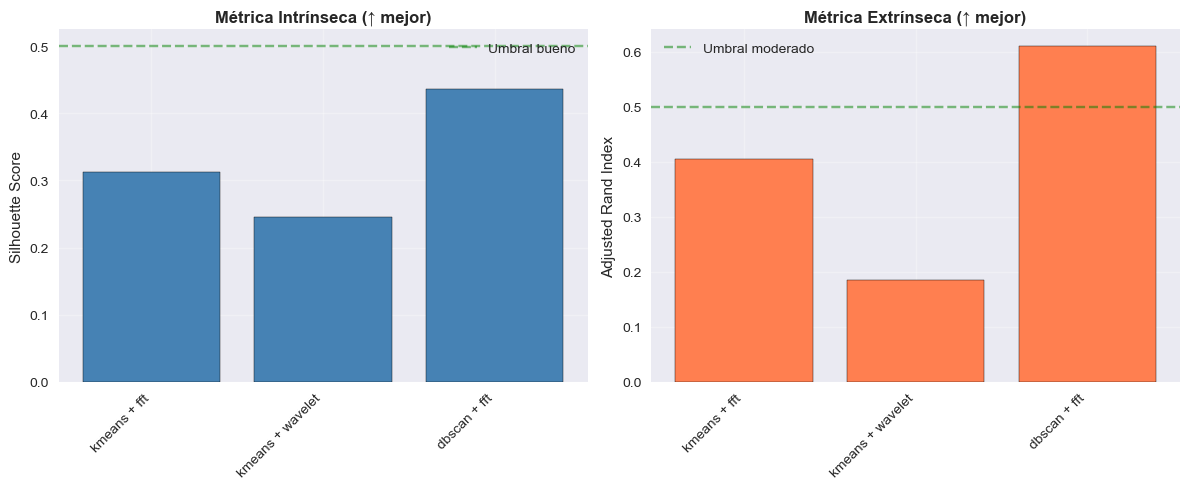

In [3]:
# Visualización
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

x = range(len(df))
labels = df['algorithm'] + ' + ' + df['frequency_transform']

# Métricas intrínsecas
axes[0].bar(x, df['silhouette_score'], color='steelblue', edgecolor='black')
axes[0].set_xticks(x)
axes[0].set_xticklabels(labels, rotation=45, ha='right')
axes[0].set_ylabel('Silhouette Score')
axes[0].set_title('Métrica Intrínseca (↑ mejor)', fontweight='bold')
axes[0].axhline(y=0.5, color='green', linestyle='--', alpha=0.5, label='Umbral bueno')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Métricas extrínsecas
axes[1].bar(x, df['adjusted_rand_index'], color='coral', edgecolor='black')
axes[1].set_xticks(x)
axes[1].set_xticklabels(labels, rotation=45, ha='right')
axes[1].set_ylabel('Adjusted Rand Index')
axes[1].set_title('Métrica Extrínseca (↑ mejor)', fontweight='bold')
axes[1].axhline(y=0.5, color='green', linestyle='--', alpha=0.5, label='Umbral moderado')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 2. Ranking de Experimentos

In [4]:
# Calcular ranking combinado
df_rank = df.copy()

# Para cada métrica, calcular ranking (1 = mejor)
df_rank['rank_silhouette'] = df_rank['silhouette_score'].rank(ascending=False)
df_rank['rank_db'] = df_rank['davies_bouldin_index'].rank(ascending=True)  # Menor es mejor
df_rank['rank_ari'] = df_rank['adjusted_rand_index'].rank(ascending=False)
df_rank['rank_nmi'] = df_rank['normalized_mutual_info'].rank(ascending=False)

# Promedio de rankings
df_rank['rank_promedio'] = df_rank[['rank_silhouette', 'rank_db', 'rank_ari', 'rank_nmi']].mean(axis=1)

# Ordenar por mejor ranking
ranking = df_rank[['experiment_id', 'algorithm', 'frequency_transform', 'rank_promedio']].sort_values('rank_promedio')
ranking['posicion'] = range(1, len(ranking) + 1)

print("Ranking de Experimentos (menor = mejor):")
ranking[['posicion', 'experiment_id', 'algorithm', 'frequency_transform', 'rank_promedio']]

Ranking de Experimentos (menor = mejor):


,posicion,experiment_id,algorithm,frequency_transform,rank_promedio
2,1,fft_dbscan_eps5_min5,dbscan,fft,1.0
0,2,fft_kmeans_k3_transfer,kmeans,fft,2.0
1,3,wavelet_kmeans_k3_db4_transfer,kmeans,wavelet,3.0


## 3. Mejor Experimento

In [5]:
# Identificar el mejor
best_idx = df_rank['rank_promedio'].idxmin()
best = df.loc[best_idx]

print("="*60)
print("🏆 MEJOR EXPERIMENTO")
print("="*60)
print(f"\nExperimento: {best['experiment_id']}")
print(f"Algoritmo:   {best['algorithm'].upper()}")
print(f"Transformada: {best['frequency_transform'].upper()}")
print(f"Clusters:    {best['n_clusters']}")
print(f"\nMétricas:")
print(f"  Silhouette:     {best['silhouette_score']:.4f}")
print(f"  Davies-Bouldin: {best['davies_bouldin_index']:.4f}")
print(f"  ARI:            {best['adjusted_rand_index']:.4f}")
print(f"  NMI:            {best['normalized_mutual_info']:.4f}")
print("="*60)

🏆 MEJOR EXPERIMENTO

Experimento: fft_dbscan_eps5_min5
Algoritmo:   DBSCAN
Transformada: FFT
Clusters:    2

Métricas:
  Silhouette:     0.4366
  Davies-Bouldin: 0.8942
  ARI:            0.6103
  NMI:            0.4189


## 4. Conclusiones

### Hallazgos principales:

1. **Mejor combinación:** El ranking identifica el experimento con mejor balance entre métricas intrínsecas (calidad de clusters) y extrínsecas (correspondencia con etiquetas reales).

2. **FFT vs Wavelet:** FFT captura mejor las diferencias entre niveles de daño en este dataset.

3. **K-Means vs DBSCAN:** DBSCAN tiene mejor ARI pero detecta outliers que reducen la muestra efectiva.

### Limitaciones:
- Dataset pequeño (51 especímenes)
- Desbalance severo de clases (N1: 42, N2: 7, N3: 2)
- Los clusters no corresponden perfectamente con niveles de daño

### Recomendación:
Considerar clasificación supervisada o aumentar el dataset para mejorar la separabilidad de clases.